In [1]:
import os
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import classification_report
from keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

In [2]:
train_data = os.path.join('train')
val_data = os.path.join('val')
test_data = os.path.join('test')

# Cria o dataset com as imagens de treino
train_dataset = image_dataset_from_directory(
    train_data,
    shuffle=True, # Embaralha as imagens
    batch_size=32, # Define o tamanho do batch
    image_size=(224, 224) # Define o tamanho das imagens
)

# Cria o dataset com as imagens de validação
val_dataset = image_dataset_from_directory(
    val_data,
    shuffle=True, # Embaralha as imagens
    batch_size=32, # Define o tamanho do batch
    image_size=(224, 224) # Define o tamanho das imagens
)

# Cria o dataset com as imagens de teste
test_dataset = image_dataset_from_directory(
    test_data,
    shuffle=True, # Embaralha as imagens
    batch_size=32, # Define o tamanho do batch
    image_size=(224, 224) # Define o tamanho das imagens
)

Found 18325 files belonging to 10 classes.
Found 3929 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.


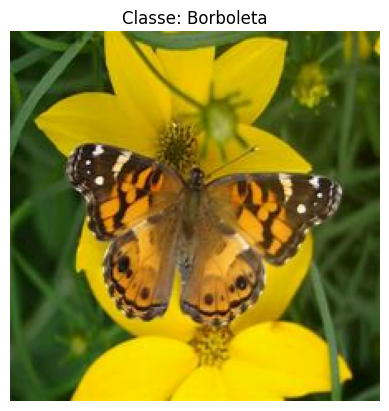

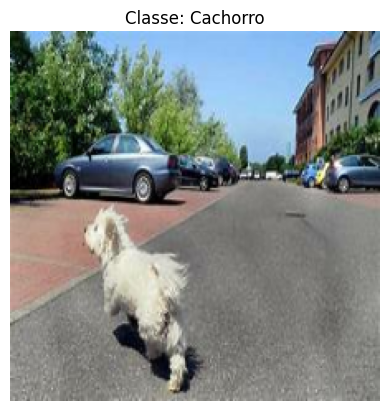

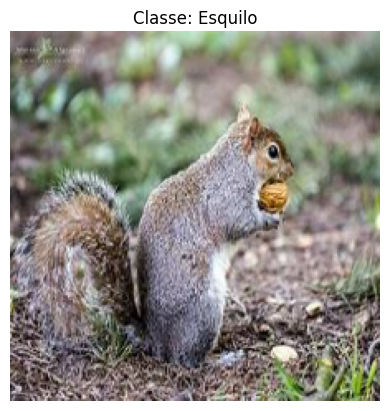

In [6]:
# Exibe uma imagem aleatória do dataset de treino
for images, labels in train_dataset.take(1):
    label_num = labels[0].numpy()
    label = train_dataset.class_names[label_num]
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Classe: {label}")
    plt.axis("off")

    plt.show()
    break

# Exibe uma imagem aleatória do dataset de validação
for images, labels in val_dataset.take(1):
    label_num = labels[0].numpy()
    label = train_dataset.class_names[label_num]
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Classe: {label}")
    plt.axis("off")

    plt.show()
    break

# Exibe uma imagem aleatória do dataset de teste
for images, labels in test_dataset.take(1):
    label_num = labels[0].numpy()
    label = test_dataset.class_names[label_num]
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Classe: {label}")
    plt.axis("off")

    plt.show()
    break

In [9]:
# Carrega o modelo VGG16 pré-treinado
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congela as camadas convolucionais
for layer in base_model.layers:
    layer.trainable = False

# Adiciona camadas personalizadas no topo
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Configura e compila o modelo, selecionando otimizador, função de loss e métrica
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treina o modelo
history = model.fit(train_dataset, epochs=10, batch_size=32, validation_data=val_dataset)

# Exibe a arquitetura do modelo
model.summary()

Epoch 1/10
573/573 [==============================] - 1495s 3s/step - loss: 2.3474 - accuracy: 0.6649 - val_loss: 0.5220 - val_accuracy: 0.8435
Epoch 2/10
573/573 [==============================] - 1490s 3s/step - loss: 0.6492 - accuracy: 0.8153 - val_loss: 0.4242 - val_accuracy: 0.8816
Epoch 3/10
573/573 [==============================] - 1485s 3s/step - loss: 0.4487 - accuracy: 0.8650 - val_loss: 0.3928 - val_accuracy: 0.8992
Epoch 4/10
573/573 [==============================] - 1471s 3s/step - loss: 0.3579 - accuracy: 0.8924 - val_loss: 0.4210 - val_accuracy: 0.8995
Epoch 5/10
573/573 [==============================] - 1517s 3s/step - loss: 0.3292 - accuracy: 0.9020 - val_loss: 0.4048 - val_accuracy: 0.9066
Epoch 6/10
573/573 [==============================] - 1476s 3s/step - loss: 0.2828 - accuracy: 0.9162 - val_loss: 0.3719 - val_accuracy: 0.9152
Epoch 7/10
573/573 [==============================] - 1472s 3s/step - loss: 0.2490 - accuracy: 0.9245 - val_loss: 0.4072 - val_accuracy:

In [10]:
# Avalia o modelo e retorna loss e acurárcia
loss, accuracy = model.evaluate(test_dataset)

# Exibe os valores de loss e acurácia
print("Loss: ", loss)
print("Acurácia: ", accuracy * 100, "%")

123/123 [==============================] - 256s 2s/step - loss: 0.4603 - accuracy: 0.9093
Loss:  0.4602634906768799
Acurácia:  90.9299373626709 %


In [11]:
# Cria os rótulos verdadeiros e preditos no conjunto de teste
y_true = []
y_pred = []

# Percorre o conjunto, realiza a predição e salva o rótulo predito e o rótulo verdadeiro
for x_batch, y_batch in test_dataset:
    y_true.extend(y_batch.numpy())
    y_pred_batch = model.predict(x_batch, verbose=0)
    y_pred.extend(np.argmax(y_pred_batch, axis=1))

# Gera o classification report
class_report = classification_report(y_true, y_pred, target_names=train_dataset.class_names)

# Imprime o classification report
print(class_report)

              precision    recall  f1-score   support

      Aranha       0.97      0.96      0.96       723
   Borboleta       0.93      0.95      0.94       313
    Cachorro       0.85      0.93      0.89       730
      Cavalo       0.88      0.92      0.90       394
    Elefante       0.92      0.94      0.93       217
     Esquilo       0.94      0.87      0.91       280
     Galinha       0.93      0.96      0.95       465
        Gato       0.94      0.79      0.86       250
      Ovelha       0.88      0.78      0.82       273
        Vaca       0.87      0.81      0.84       280

    accuracy                           0.91      3925
   macro avg       0.91      0.89      0.90      3925
weighted avg       0.91      0.91      0.91      3925



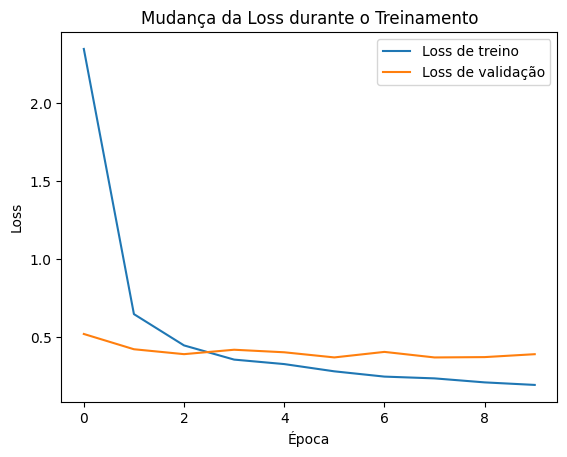

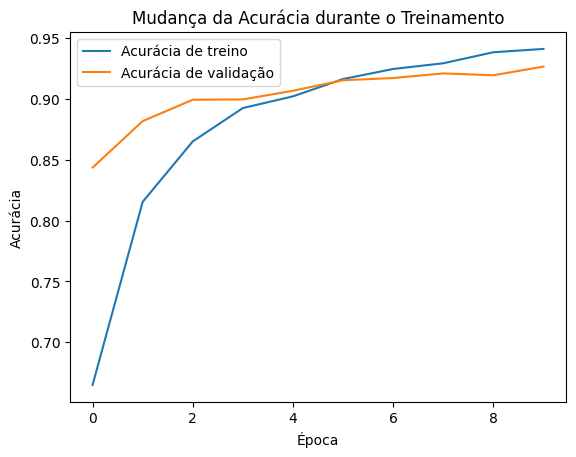

In [12]:
# Seleciona os valores de loss e de acurácia de treino e validação durante as épocas
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
accuracy_values = history.history['accuracy']
val_accuracy_values = history.history['val_accuracy']

# Realiza a plotagem da loss
plt.plot(loss_values, label='Loss de treino')
plt.plot(val_loss_values, label='Loss de validação')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Mudança da Loss durante o Treinamento')
plt.legend()
plt.show()

# Realiza a plotagem da acurácia
plt.plot(accuracy_values, label='Acurácia de treino')
plt.plot(val_accuracy_values, label='Acurácia de validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Mudança da Acurácia durante o Treinamento')
plt.legend()
plt.show()